# Qiskit 설치 및 수업 준비

## 필수 패키지 설치

[공식 Qiskit 설치 가이드](https://qiskit.org/documentation/getting_started.html)

최신 버젼의 Qiskit을 설치하는 것! 헷갈리신다면 다음의 순서를 따라해보세요 

1. [아나콘다 설치](https://www.anaconda.com/)

    1-1. 만약 오래된 아나콘다가 설치되어 있다면 터미널을 열어 다음의 명령어를 실행해 보세요

    `conda update -n base conda`
    
2. 환경 만들기

`conda create -n qiskit python=3.10`

3. 쥬피터 노트북 혹은 쥬피터 랩 설치

`conda install jupyter notebook` 혹은 `conda install jupyterlab`

4.  Qiskit 설치 (visualization tool 함께 설치)

`pip install 'qiskit[visualization]'`

5.  Qiskit ibmq provider 설치

`pip install qiskit-ibmq-provider`

6. Qiskit Aer provider 설치

`pip install qiskit-aer`

7. 추가 라이브러리 설치 (터미널 환경)

`git clone https://github.com/qiskit-research/qiskit-research.git`

`cd qiskit-research`

`pip install . `

## 패키지 설치 확인
설치가 잘 되었는지 다음의 명령어를 실행해서 확인해 봅시다.

In [1]:
import qiskit.tools.jupyter
%qiskit_version_table

In [54]:
# 필수 라이브러리 불러오기 

import numpy as np
from math import sqrt, pi

from qiskit import *
from qiskit.visualization import plot_histogram, plot_distribution, plot_error_map
from qiskit.visualization.array import array_to_latex
from qiskit.quantum_info import Operator, Statevector, random_statevector

from qiskit.primitives import Sampler, Estimator
from qiskit_aer import AerSimulator, StatevectorSimulator



 ## Bit and Qubit

여러분의 휴대폰, 컴퓨터 등과 같은 디지털 기기들은 모두 0과 1로 데이터를 구축하고 있습니다. 우리가 컴퓨터화면을 통해 보는 이미지나 유튜브를 통해 듣는 음악, 키보드의 입력등은 모두 컴퓨터의 중앙처리장치에서 0과 1의 무수한 조합으로 구성되며 0과 1에 대한 논리 연산을 통해 처리됩니다. 아래의 셀에 여러분의 한글 이름을 입력하고 Shift+Enter를 눌러서 실행시켜 보세요. 여러분의 이름은 저렇게 많은 0과 1로 표현되고 있습니다.

In [3]:
st = "신소영"
' '.join(format(x, 'b') for x in bytearray(st, 'utf-8'))

'11101100 10001011 10100000 11101100 10000110 10001100 11101100 10011000 10000001'

하나의 비트는 한번에 0 또는 1의 값을 가질 수 있습니다. 마치 스위치를 켜고 끄는 것과 같습니다. 

이에 비해 양자컴퓨터는 큐비트라고 불리는, 양자 역학적인 성질를 지니는 연산 단위를 계산에 사용합니다. 큐비트가 비트와 구별되는 가장 큰 특성은 0과 1을 동시에 가질 수 있다는 점 입니다. 큐비트도 일반 비트처럼 0과 1상태를 지닙니다. 큐비트의 상태는 복소수 벡터로 주로 표현되기 때문에 $|0\rangle$과 $|1\rangle$로 0과 1상태를 표현하며, 큐비트가 가질 수 있는 무한히 가능한 상태들 중 이 두 상태는 계산의 기본이 되는 `계산 기저`라고 부르고, 양자 회로를 구성하여 측정할 경우 큐비트의 상태는 이 둘 중의 하나로만 측정될 수 있습니다.

큐비트는 0과 1의 상태를 동시에 가질 수 있는 크기가 1인 복소수 벡터이기 때문에, 다음과 같이 일반적으로 표현합니다. 

$$\left|\psi\right\rangle = \alpha\left|0\right\rangle + \beta \left|1\right\rangle$$

이때 $\psi$는 큐비트의 임의의 양자상태를 표현하는 기호로 사용되고 있으며 이 임의의 상태가 갖는 $|0\rangle$ 상태의 계수를 $\alpha$,  $|1\rangle$ 상태의 계수를 $\beta$라 정의하며 이 두 계수는 허수부를 갖는 복소수 입니다. 큐비트를 측정하면 0 또는 1의 상태로 측정되며 각각 측정될 확률($|\alpha|^2$과 $|\beta|^2$)을 더하면 1이 되어야 하는 조건을 지니고 있습니다. 이 조건은 다음과 같이 식으로 표현할 수있습니다. 

$$|\alpha|^2+ |\beta|^2 = 1$$ 

큐비트의 계산 기저 역시 벡터형태로 존재하기 때문에, 다음과 같이 행렬로 정의 됩니다.

$$
|0\rangle =  
\begin{pmatrix}
1 \\
0
\end{pmatrix} , 
|1\rangle =  
\begin{pmatrix}
0 \\
1
\end{pmatrix}
$$

따라서 $\psi$는 다음과 같이 행렬로 표현할 수 있습니다.

$$
\left|\psi\right\rangle =  
\begin{pmatrix}
\alpha \\
\beta
\end{pmatrix}
$$

위와 같이 큐비트의 상태를 두개의 복소수로 표현하게 되면, (a + bi), (c + di)와 같이 총 네개의 실수가 필요하게 됩니다. 하지만 두 계수의 절대값의 제곱의 합이 1이 된다는 조건을 활용하여 삼각함수를 적용하면, 큐비트의 상태는 다음과 같이 두 개의 실수 ($\theta$, $\phi$)만으로 정의할 수 있게 됩니다.

$$\left|\psi\right\rangle = \cos(\theta/2)\left|0\right\rangle + \sin(\theta/2)e^{i\phi}\left|1\right\rangle$$

그리고 이렇게 정의된 큐비트의 상태는 반지름이 1인 원위의 점으로 표현할 수 있어지며, 이것이 큐비트의 상태를 표현하기 위해 자주 사용되는 블로흐 구면입니다.

<img src="https://user-images.githubusercontent.com/62553200/125445676-0d502818-1341-482c-9291-a38d652469be.png" alt="Alternative text" width=300/>


지금부터, 다음 실습에 필요한 단일 / 다중 양자게이트들의 기능을 Qiskit을 사용해 구현해 보고 그 동작을 블로흐 구면을 사용해 확인해 보겠습니다. 먼저 단일 큐비트 게이트부터 시작해 봅시다.

### Single Qubit Gate

#### X Gate

X게이트는 큐비트의 상태를 반전시킵니다. 즉 $X|0\rangle = |1\rangle$, $X|1\rangle = |0\rangle$을 만족하기 때문에 일반적으로 bit-flip 게이트로 불립니다.

$$
X = 
\begin{pmatrix}
0 & 1\\
1 & 0
\end{pmatrix}
$$

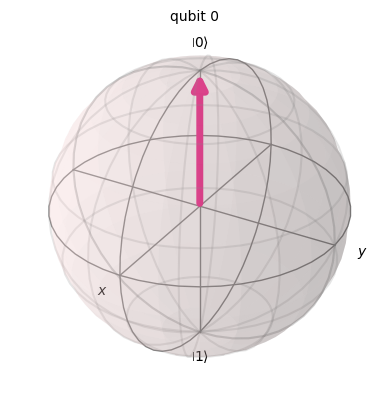

In [4]:
x_gate = QuantumCircuit(1)
Statevector(x_gate).draw('bloch')

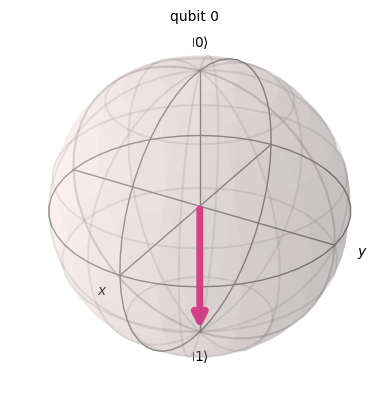

In [5]:
x_gate.x(0)
Statevector(x_gate).draw('bloch')

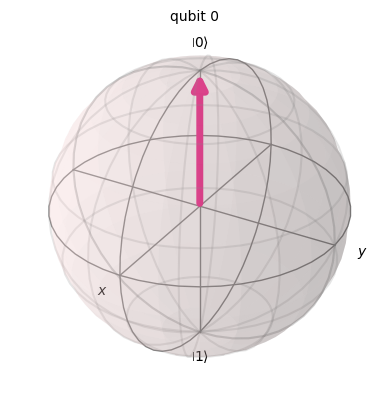

In [6]:
x_gate.x(0)
Statevector(x_gate).draw('bloch')

#### Y Gate

$Y$ 게이트는 큐비트의 상태를 블로흐 구면의 Y축을 기준으로 $\pi/2$ 만큼 회전하며 다음과 같이 정의 됩니다:

$$
Y  = 
\begin{pmatrix}
0 & -i\\
i & 0
\end{pmatrix}
$$

$$
Y  =  -i|0\rangle\langle 1| + i|1\rangle \langle 0|
$$

$$Y|0\rangle = i|1\rangle$$
$$Y|1\rangle = -i|0\rangle$$

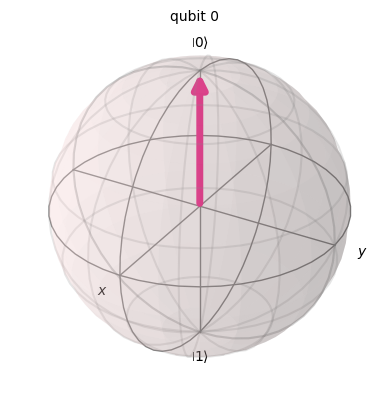

In [7]:
y_gate = QuantumCircuit(1)
Statevector(y_gate).draw('bloch')

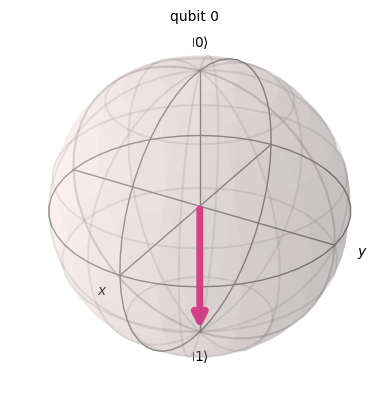

In [8]:
y_gate.y(0)
Statevector(y_gate).draw('bloch')

#### Hadamard Gate

하다마드 게이트는 x축과 z축의 중간 지점을 기준으로 $\pi$만큼 큐비트의 상태를 회전하는 것과 같습니다. 하다마드 게이트는 $|0\rangle$ 상태를 $\frac{|0\rangle + |1\rangle}{\sqrt{2}}$로, $|1\rangle$ 상태를 $\frac{|0\rangle - |1\rangle}{\sqrt{2}}$로 변환하며 그 반대도 성립하기 때문에 일반적으로 뒤의 상태를 각각 $|+\rangle$와 $|-\rangle$ 상태로 부르기 때문에, $|0\rangle$과 $|1\rangle, $|+\rangle$와  $|-\rangle$ 사이의 변환이라고 표현 하기도 합니다. 

$$
H = 
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1\\
1 & -1
\end{pmatrix}
$$

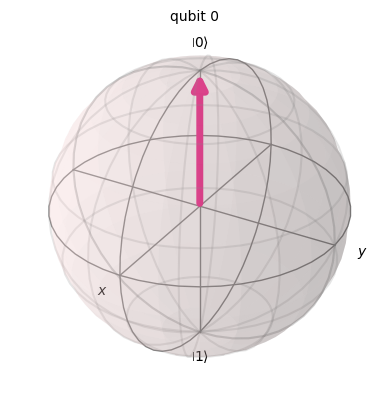

In [9]:
h_gate = QuantumCircuit(1)
Statevector(h_gate).draw('bloch')

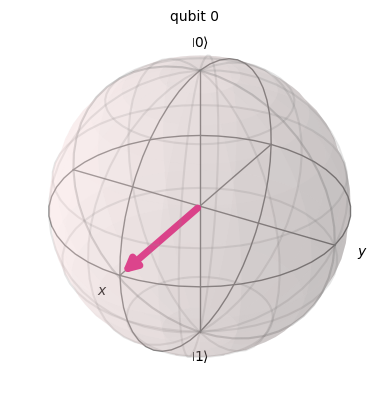

In [10]:
h_gate.h(0)
Statevector(h_gate).draw('bloch')

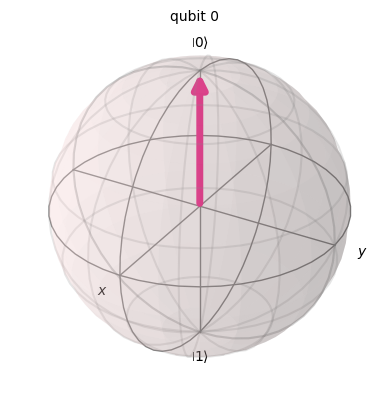

In [11]:
h_gate.h(0)
Statevector(h_gate).draw('bloch')

#### $Z$: phase-flip 게이트

$Z$ 게이트는 위상 반전 게이트로 불리며 다음과 같이 정의됩니다:

$$
Z = 
\begin{pmatrix}
1 & 0\\
0 & -1
\end{pmatrix}
$$

$$
Z  =  |0\rangle\langle 0| + -|1\rangle \langle 1|
$$

$$Z|0\rangle = |0\rangle$$
$$Z|1\rangle = -|1\rangle$$

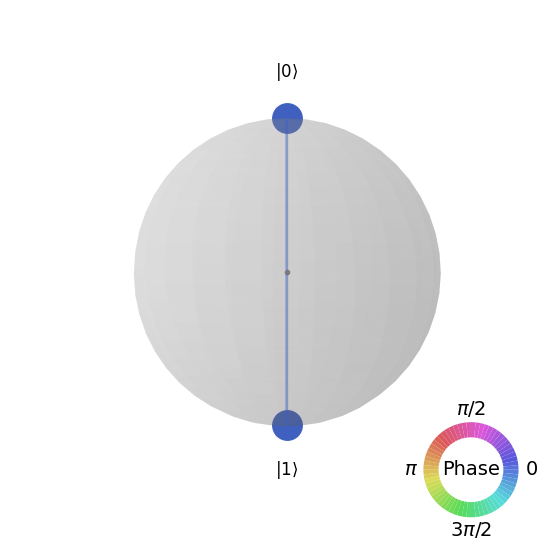

In [12]:
z_gate = QuantumCircuit(1)
z_gate.h(0)  
Statevector(z_gate).draw('qsphere')

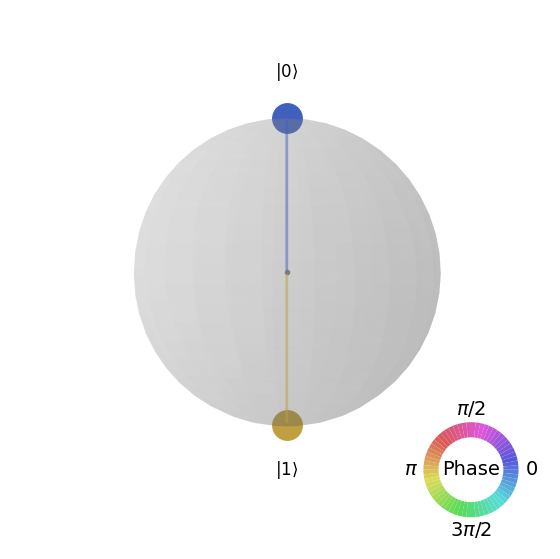

In [13]:
z_gate.z(0)  
Statevector(z_gate).draw('qsphere')

### Multi Qubit Gate

다중 큐비트 게이트를 알아보기 전, 다중 큐비트 상태의 표현법 (tensor product)에 대해 알아봅시다. 두개의 큐비트로 이루어진 시스템을 생긱하 봅시다. 
$A$와 $B$가 각각의 큐비트에 작용한다고 할때 두 연산자의 텐서곱 $A \otimes B$은 다음과 같습니다.

$$\begin{equation}
	A\otimes B = 
	\begin{pmatrix} 
		A_{00} \begin{pmatrix} 
			B_{00} & B_{01} \\
			B_{10} & B_{11}
		\end{pmatrix} & A_{01} 	\begin{pmatrix} 
				B_{00} & B_{01} \\
				B_{10} & B_{11}
			\end{pmatrix} \\
		A_{10} 	\begin{pmatrix} 
					B_{00} & B_{01} \\
					B_{10} & B_{11}
				\end{pmatrix} & A_{11} 	\begin{pmatrix} 
							B_{00} & B_{01} \\
							B_{10} & B_{11}
						\end{pmatrix}
	\end{pmatrix},						
\end{equation}$$

같은 방식으로 2 큐비트 시스템의 계산 기저도 같은 방식으로 단일큐비트의 계산 기저로 부터 만들어 집니다. 

$$\begin{equation}\begin{split}
	\left|{00}\right\rangle &= \begin{pmatrix} 
		1 \begin{pmatrix} 
			1  \\
			0
		\end{pmatrix} \\
		0 \begin{pmatrix} 
			1  \\
			0 
		\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix} 1 \\ 0 \\ 0 \\0 \end{pmatrix}~~~\left|{01}\right\rangle = \begin{pmatrix} 
	1 \begin{pmatrix} 
	0 \\
	1
	\end{pmatrix} \\
	0 \begin{pmatrix} 
	0  \\
	1 
	\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix}0 \\ 1 \\ 0 \\ 0 \end{pmatrix}\end{split}
\end{equation}$$
    
$$\begin{equation}\begin{split}\left|{10}\right\rangle = \begin{pmatrix} 
	0\begin{pmatrix} 
	1  \\
	0
	\end{pmatrix} \\
	1\begin{pmatrix} 
	1 \\
	0 
	\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix}~~~ 	\left|{11}\right\rangle = \begin{pmatrix} 
	0 \begin{pmatrix} 
	0  \\
	1
	\end{pmatrix} \\
	1\begin{pmatrix} 
	0  \\
	1 
	\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \\1 \end{pmatrix}\end{split}
\end{equation}.$$


#### Controlled Gate

대부분의 2 큐비트 게이트들은 SWAP 게이트를 제외하면 대부분 제어 연산의 형태입니다. 일반적으로 제어 연산의 경우 제어 비트와 대상 비트, 그리고 대상 비트에 적용될 단일 큐비트 유니터리 연산자 $U$ 로 정의됩니다. 
임의의 $U$를 다음과 같이 생각해 봅시다.

$$U = \begin{pmatrix} u_{00} & u_{01} \\ u_{10} & u_{11}\end{pmatrix}$$

이 연산자를 사용한 제어 연산은 다음과 같이 생각 해 볼 수 있습니다. **control qubit**가 **qubit 0** 이고, **control qubit**가  **qubit 1**인 경우를 생각해 봅시다. 이 경우 제어 연산은 **qubit 0**이 1일때 $U$를  **qubit 1**에 적용하기 때문에 계산 기저는 다음과 같이 영향을 받게 됩니다. 

$$\begin{align*}
C_{U}: \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle} &\rightarrow \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle}\\
C_{U}: \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle} &\rightarrow \underset{\text{qubit}~1}{U\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle}\\
C_{U}: \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle} &\rightarrow \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle}\\
C_{U}: \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle} &\rightarrow \underset{\text{qubit}~1}{U\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle}\\
\end{align*}.$$

이것을 행렬의 형태로 작성해 보면 $C_{U}$연산은 다음과 같이 정리할 수 있습니다.

$$\begin{equation}
	C_U = \begin{pmatrix}
	1 & 0 & 0 & 0 \\
	0 & u_{00} & 0 & u_{01} \\
	0 & 0 & 1 & 0 \\
	0 & u_{10} &0 & u_{11}
		\end{pmatrix}.
\end{equation}$$


이제 **qubit 1**이 제어 비트이고 **qubit 0** 대상 비트가 되는 경우를 생각해 봅시다. 이 경우 계산 기저는 

$$\begin{align*}
C_{U}: \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle} &\rightarrow \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle}\\
C_{U}: \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle} &\rightarrow \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle}\\
C_{U}: \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle} &\rightarrow \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{U\left|0\right\rangle}\\
C_{U}: \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle} &\rightarrow \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{U\left|1\right\rangle}\\
\end{align*},$$

위와 같이 변하게 되고 이것을 행렬의 형태로 정리하면 아래와 같게 됩니다. 

$$\begin{equation}
	C_U = \begin{pmatrix}
	1 & 0 & 0  & 0 \\
	0 & 1 & 0 & 0 \\
	0 & 0 & u_{00} & u_{01} \\
	0 & 0 & u_{10} & u_{11}
		\end{pmatrix}.
\end{equation}$$

#### CX 게이트

이제 가장 많이 사용하게 되는 제어 연산 중 하나인 Controlled-X, CX 게이트에 대해서 살펴봅시다. CX 연산은 제어 큐비트가 1일때 X 게이트를 적용하는 연산으로 제어 큐비트가 큐비트 1, 대상 큐비트가 큐비트 0일때 위의 행렬식과 같이 아래와 같은 행렬식을 갖게 되며, 10과 11상태를 서로 교환하는 것으로 이해하기도 합니다.

$$
C_X = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0
\end{pmatrix}. 
$$

반대로, 제어 큐비트가 큐비트 0, 대상 큐비트가 큐비트 1이라면 아래와 같아 지며 01과 11의 상태를 서로 교환하는 것으로 이해하기도 합니다.

$$
C_X = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0
\end{pmatrix}. 
$$

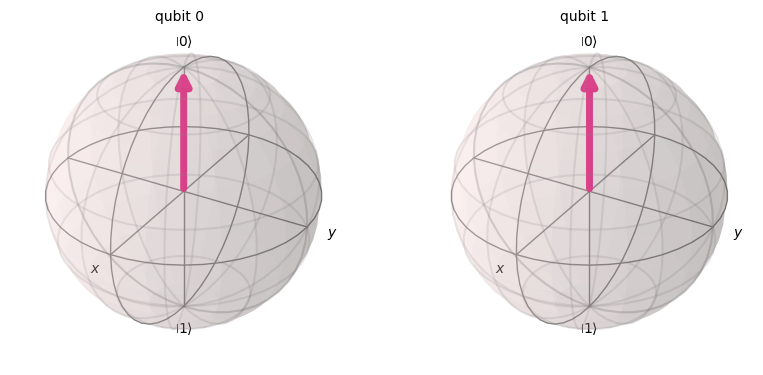

In [14]:
cx_gate = QuantumCircuit(2)
Statevector(cx_gate).draw('bloch')

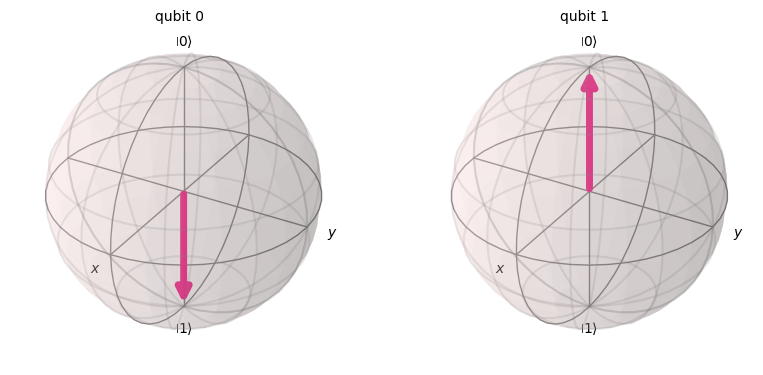

In [15]:
cx_gate.x(0)
Statevector(cx_gate).draw('bloch')

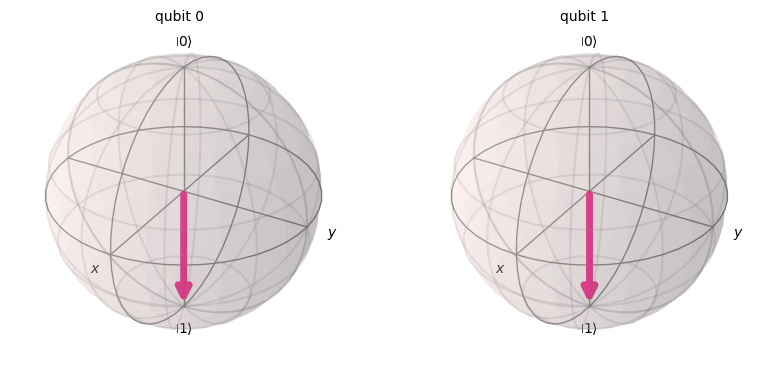

In [16]:
cx_gate.cx(0,1)
Statevector(cx_gate).draw('bloch')

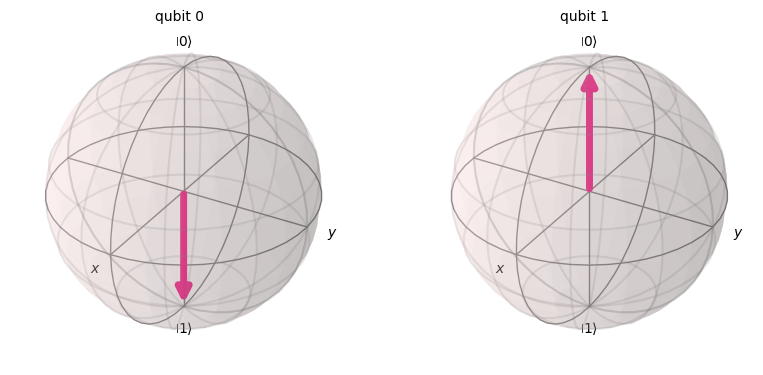

In [17]:
cx_gate.cx(0,1)
Statevector(cx_gate).draw('bloch')

#### SWAP gate

스왑 게이트는 두 큐비트의 상태를 통째로 교환합니다. 이 게이트는 계산 기저를 다음과 같이 변환합니다. 

$$\left|00\right\rangle \rightarrow \left|00\right\rangle~,~\left|01\right\rangle \rightarrow \left|10\right\rangle~,~\left|10\right\rangle \rightarrow \left|01\right\rangle~,~\left|11\right\rangle \rightarrow \left|11\right\rangle,$$

이 연산은 행렬로 표현하면 다음과 같습니다. 

$$
\mathrm{SWAP} = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1
\end{pmatrix}.
$$

Swap 게이트의 성능을 확인하기 위해 각각의 큐비트를 임의의 상태벡터로 초기화 해보도록 합시다.

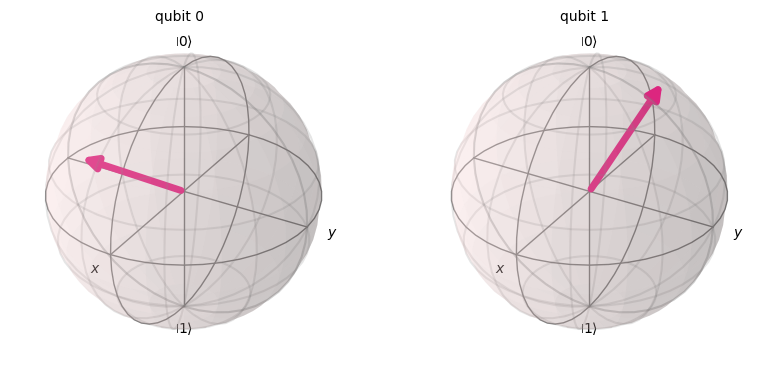

In [18]:
swap_gate = QuantumCircuit(2)
initial_1 = random_statevector(2)   
initial_2 = random_statevector(2)   
swap_gate.initialize(initial_1, 0)
swap_gate.initialize(initial_2, 1)
Statevector(swap_gate).draw('bloch')

In [19]:
array_to_latex(Statevector(swap_gate))

<IPython.core.display.Latex object>

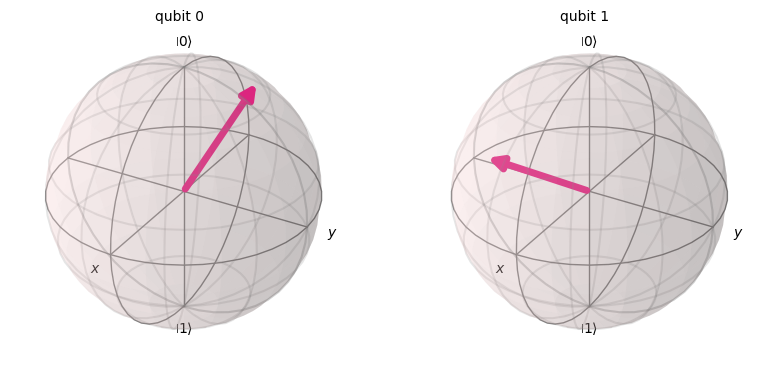

In [20]:
swap_gate.swap(0,1)
Statevector(swap_gate).draw('bloch')

In [21]:
array_to_latex(Statevector(swap_gate))

<IPython.core.display.Latex object>

### 측정


큐비트는 여러가지 중첩 가능한 상태로 초기화 되어 사용 될 수 있습니다. 하지만 한번 측정되고 난 후에는 $|0\rangle$이나 $|1\rangle$로 그 상태가 결정됩니다. 이것을 측정이 큐비트의 상태를 0또는 1로 붕괴시킨다고 표현하곤 합니다. 

다음의 실습에서 measurement를 포함하거나 포함하지 않은, 두가지 회로를 구성하고, 각 경우 최종 회로의 statevector값을 확인해 봅시다. 큐비트의 초기 값은  0과 1로 측정될 확률이 각각 50%에 해당하는 Qiskit 텍스트북에 제시된 상태를 사용하도록 하겠습니다.

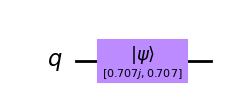

In [22]:
#측정이 없는 회로

qc_without_measurment = QuantumCircuit(1) # We are redefining qc
initial_state = [0.+1.j/sqrt(2),1/sqrt(2)+0.j]
qc_without_measurment.initialize(initial_state, 0)
qc_without_measurment.draw('mpl')


In [23]:
backend = StatevectorSimulator()
backend.run(qc_without_measurment).result().get_statevector()

Statevector([0.        +0.70710678j, 0.70710678+0.j        ],
            dims=(2,))


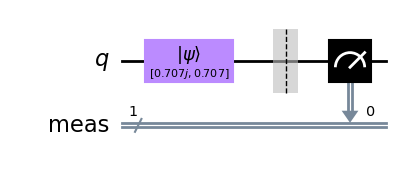

In [24]:
#측정이 있는 회로

qc_with_measurment = QuantumCircuit(1) # We are redefining qc
initial_state = [0.+1.j/sqrt(2),1/sqrt(2)+0.j]
qc_with_measurment.initialize(initial_state, 0)
qc_with_measurment.measure_all()
qc_with_measurment.draw('mpl')

In [25]:
backend = StatevectorSimulator()
backend.run(qc_with_measurment).result().get_statevector()

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


바로 위의 셀을 여러번 실행시켜 보면 statevector의 값이 0 또는 1에 해당하게 계속 변하는 것을 볼수있습니다. 마치 동전던지기와 같습니다 :)

### A Note about Quantum Simulators

`qiskit_aer`는 Qiskit의 시뮬레이션 패키지로, 다음과 같은 시뮬레이터 들을 보유하고 있습니다
- [AerSimulator](https://qiskit.org/ecosystem/aer/stubs/qiskit_aer.AerSimulator.html#qiskit_aer.AerSimulator)
- [QasmSimulator](https://qiskit.org/ecosystem/aer/stubs/qiskit_aer.QasmSimulator.html#qiskit_aer.QasmSimulator)
- [StatevectorSimulator](https://qiskit.org/ecosystem/aer/stubs/qiskit_aer.StatevectorSimulator.html#qiskit_aer.StatevectorSimulator)
- [UnitarySimulator](https://qiskit.org/ecosystem/aer/stubs/qiskit_aer.UnitarySimulator.html#qiskit_aer.UnitarySimulator)

이 중 `AerSimulator`는 회로를 실행하고 측정된 값의 count를 반환합니다. 노이즈가 없는 이상적인 시뮬레이션을 하며 실행의 기본값은 `shots=1024`로 회로를 1024번 실행하도록 하고 있습니다. 

### Bloch Sphere vs QSphere

Qiskit은 양자 상태를 visual하고, 직관적으로 보여주기 위해 세가지 라이브러리를 제공하고 있습니다. 
- [plot_bloch_vector](https://qiskit.org/documentation/stubs/qiskit.visualization.plot_bloch_vector.html) (입력이 구면의 좌표, Cartesian or Spherical)
- [plot_bloch_multivector](https://qiskit.org/documentation/stubs/qiskit.visualization.plot_bloch_multivector.html) (입력이 statevector)
- [plot_state_qsphere](https://qiskit.org/documentation/stubs/qiskit.visualization.plot_state_qsphere.html) (입력이 statevector)

다음의 실습에서는 임의의 양자상태를 생성하고, 세가지 라이브러리를 사용해 큐비트의 상태를 표현해 보도록 하겠습니다.

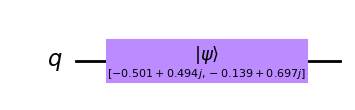

In [26]:
from qiskit.visualization import plot_state_qsphere, plot_bloch_vector, plot_bloch_multivector

qc = QuantumCircuit(1)
initial_state = random_statevector(2) 
qc.initialize(initial_state, 0)

qc.draw('mpl')

In [27]:
def get_spherical_coordinates(statevector):
    # Convert to polar form:
    r0 = np.abs(statevector[0])
    ϕ0 = np.angle(statevector[0])

    r1 = np.abs(statevector[1])
    ϕ1 = np.angle(statevector[1])

    # Calculate the coordinates:
    r = np.sqrt(r0 ** 2 + r1 ** 2)
    θ = 2 * np.arccos(r0 / r)
    ϕ = ϕ1 - ϕ0
    return [r, θ, ϕ]

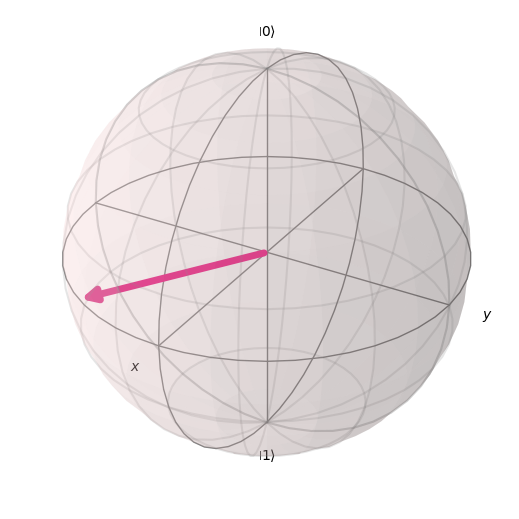

In [28]:
plot_bloch_vector(get_spherical_coordinates(initial_state), coord_type = 'spherical')

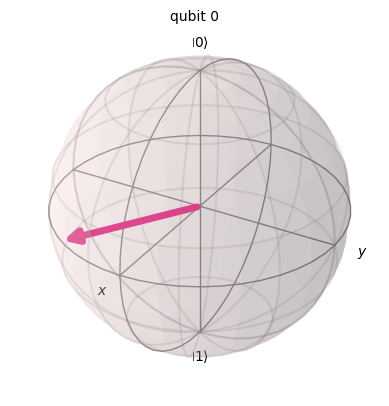

In [29]:
plot_bloch_multivector(initial_state)

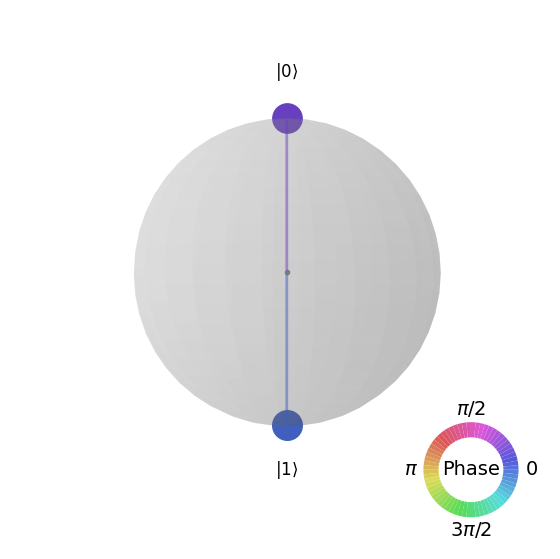

In [30]:
plot_state_qsphere(initial_state)

# Deutsch-Jozsa 알고리듬

[Qiskit Textbook Link](https://learn.qiskit.org/course/v2_ch-algorithms/deutsch-jozsa-algorithm)

Qiskit과 함께 하는 코딩 수업 두번째에 오신 여러분을 환영합니다! 이번 시간에는 총 세가지 양자 알고리듬(Deutsch-Jozsa algorithm, Shor's algorithm, Grover's algorithm) 에 대한 실습과 함께, 코딩 실습과 퀴즈 쇼를 함께 진행해 보겠습니다. 

우선 먼저, Deutsch-Jozsa 알고리듬을 알아보도록 합시다.

도이치-조사의 알고리즘은 고전 알고리즘보다 우수한 성능을 가지고 있다고 발표 된 첫 번째 양자 알고리즘입니다 (참고 문헌 [1](https://royalsocietypublishing.org/doi/10.1098/rspa.1992.0167)에서 처음 소개되었습니다). 특정 문제에 대해 양자 컴퓨터를 사용하는 이점이 입증된 첫 번째 양자 알고리즘으로 실생활에 유용한 알고리듬은 아닌, 양자적 이득을 얻는 문제의 컨셉을 제안했다고 보는 것이 더 정확할 것 같습니다. 

## Deutsch-Jozsa Problem

<img src="img/djp.png" width=400/>

비트열을 입력으로 받아,0 또는1 중 하나를 반환하는 위와 같은 부울 함수있다고 가정합니다.

이 함수는 Constant이거나 Balanced 이며, Constant일 경우 입력값에 상관없이 0 또느 1을 반환하지만, Balanced 일 경우는 입력에 따라, 절반은 0을, 절반은 1을 반한홥니다. Deutsch-Jozsa 문제는 이 미지의 함수 - 오라클 - 이 Constant인지, Balanced인지를 판단하는 문제입니다. 

Deutsch는 1985년에 이 문제의 1비트 버전을 `Quantum theory, the Church–Turing principle and the universal quantum computer` [2](https://royalsocietypublishing.org/doi/10.1098/rspa.1985.0070)에서 소개했으며 이 문제를 N 큐비트 문제로 일반화한 결과가 [1](https://royalsocietypublishing.org/doi/10.1098/rspa.1992.0167)의 논문에 소개된 Deutsch-Jozsa 문제입니다. 


## 고전적인 해법

실습을 위해 두 개의 오라클을 준비해두었습니다. 두 오라클은 `'01011'`과 같은 형태의 5 비트 string을 입력으로 받습니다. 다음과 같이 5비트 입력을 준비하는 함수를 불러옵니다. 

In [31]:
from function import test_dj1, test_dj2, prepare_5_bit, test_dj3

prepare_5_bit()

['00000',
 '00001',
 '00010',
 '00011',
 '00100',
 '00101',
 '00110',
 '00111',
 '01000',
 '01001',
 '01010',
 '01011',
 '01100',
 '01101',
 '01110',
 '01111',
 '10000',
 '10001',
 '10010',
 '10011',
 '10100',
 '10101',
 '10110',
 '10111',
 '11000',
 '11001',
 '11010',
 '11011',
 '11100',
 '11101',
 '11110',
 '11111']

prepare_5_bit 함수의 출력 결과를 result라는 이름의 list에 저장한 후, 이 list를 사용해 `test_dj1`과 `test_dj2`가 각각 constant인지, balanced 함수 인지 확인해 봅시다.

고전적인 방식으로 이 문제를 해결하기 위해서는 Brute force라 불리는 방법으로, 가능한 입력을 모두 하나씩 넣어 보아야 합니다. 가장 운이 좋다면 첫번째 입력과 두번째 입력만을 비교해서 다름을 확인하여 두번째 검색 만에 결과를 알수도 있을 것이고, 운이 아주 나쁘다면 절반에 해당하는 16개를 검색해 본 후 17번째 값을 확인해야 할 수도 있습니다. 다음의 예제를 참고하여 두 함수의 성질을 확인해 보세요!

In [32]:
# example result의 첫번째 값으로 test_dj3 (trial function) 에 넣어서 결과 확인
result = prepare_5_bit()
test_dj3(result[0])

1

for i in range( 2 ** 5):
    print(test_dj2(result[i]))

네 맞습니다! 두 함수는 모두 Balanced 함수이고, 제가 작성한 코드 기준으로 각각 2번, 17번의 Query가 필요했습니다. 

그럼 이제 양자컴퓨터의 해법을 살펴보도록 합시다.

## 양자적 해법

### Qubit encoding

지금까지 우리는 Hadamard Gate를 사용하여, 큐비트의 중첩상태를 활용해 양자 회로에 테스트하고자 하는 입력상태를 한꺼번에 전달하는 방식을 사용했습니다. 이것은 Quantum Parallelism이라 불리는 아주 간단하면서 강력한 방법 중, 고전정보-0또는 1-를 큐비트의 $|0\rangle, |1\rangle$에 매핑하여 사용하는 "Basis Encoding"에 해당합니다. 

다음의 양자회로가 Encoding 하는 고전 상태는 무엇인지 생각해봅시다.

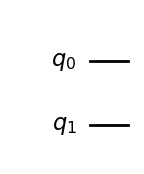

<IPython.core.display.Latex object>

In [33]:
qc = QuantumCircuit(2)
display(qc.draw('mpl'))
display(array_to_latex(Statevector(qc)))

맞습니다! '00'입니다. 그렇다면 다음의 상태를 3큐비트 회로에 인코딩하는 방법을 생각해 봅시다.
$$|\psi\rangle = \frac{1}{\sqrt{2}}(|101\rangle + |111\rangle)$$

In [34]:
qc = QuantumCircuit(3)
qc.x(0)
qc.h(1)
qc.x(2)
display(array_to_latex(Statevector(qc)))

<IPython.core.display.Latex object>

이어서, 우리가 자주 사용하게 될, 모든 큐비트에 Hadamard Gate를 사용한 회로를 만들고 StateVector를 계산해 봅시다.

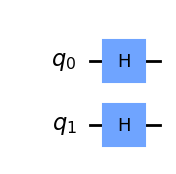

<IPython.core.display.Latex object>

In [35]:
qc = QuantumCircuit(2)
qc.h([0,1])
display(qc.draw('mpl'))
display(array_to_latex(Statevector(qc)))

간단한 회로로 실습에서 계속 사용할 Data Encoding 방법을 익혔으니, Deutsch-Jozsa 문제를 수식을 사용해 확인해 봅시다.


### 수식으로 이해해 보기

Qiskit Textbook의 설명이 다소! 헷갈리는 부분이 있으니, 하나의 추가적인 Reference를 사용해서 알고리듬의 방식을 잘 이해해 봅시다. 

[Thomas Wong - Introduction to classical and quantum computing](https://www.thomaswong.net/introduction-to-classical-and-quantum-computing-1e3p.pdf)

<img src="https://learn.qiskit.org/content/v2/ch-algorithms/images/deutsch_steps.png" alt="Alternative text" width=600/>

### Step 0 - State preparation

$$|0\rangle^{\otimes n} |1\rangle$$

### Step 1 - Apply Hadamard

$$|+\rangle^{\otimes n} |-\rangle$$
이때, $|+\rangle^{\otimes n} = \frac{1}{\sqrt{2^n}}(|0\rangle + |1\rangle)^{\otimes n} = \frac{1}{\sqrt{2^n}}\sum_{x \in \{0,1\}^n}^{}|x\rangle $

### Step 2 - Apply Oracle

Textbook과 이 노트의 표현을 합치면, 

$\frac{1}{\sqrt{2^{n+1}}}\sum_{x \in \{0,1\}^n}^{} |x\rangle (|0\rangle - |1\rangle)  \rightarrow U_f ( y \rightarrow y \bigoplus f(x)) \rightarrow $ 이면 (이때 $\bigoplus$는 add modulo 2. 즉 1 + 1 = 0,0 + 1 = 1)

만약 $f(x) = 0 이면, |0\rangle - |1\rangle$ 이고 $f(x) = 1 이면, |1\rangle - |0\rangle$이므로 이것을 조금 더 축약하여 정리하면, $(-1)^{f(x)}(|0\rangle - |1\rangle)$로 쓸수 있습니다.. 따라서, 아래쪽 $|-\rangle$ 상태의 큐비트가 변하지 않고, $f(x)$값이 1인 x에 대하여, $-1$의 Phase가 $x$에 씌워지는 것으로 이해할 수 있기 때문에 입력쪽 큐비트를 다시 다음과 같이 정리할 수 있습니다.
$$\frac{1}{\sqrt{2^{n}}}\sum_{x \in \{0,1\}^n}^{}(-1)^{f(x)} |x\rangle$$

### Step 3 - Apply Hadamard

$\frac{1}{\sqrt{2^{n}}}\sum_{x \in \{0,1\}^n}^{}(-1)^{f(x)} |x\rangle$의 상태에 최종적으로 Hadamard 게이트를 적용하며, 이때의 상태는 다음과 같습니다 - $\frac{1}{\sqrt{2^{n}}}\sum_{x \in \{0,1\}^n}^{}(-1)^{f(x)}H^{\otimes n} |x\rangle$. 여기에서 $H^{\otimes n} |x\rangle$이 부분에 주목해 봅시다.
$$H^{\otimes n} |x\rangle = H|x_{n-1}\rangle H|x_{n-2}\rangle ... H|x_0\rangle$$
$x$의 값(0 or 1)에 따라 $H|x\rangle = |+\rangle or |-\rangle$이 되므로, 위와 같은 방식으로 이 상태를 다음과 같이 정리할 수 있습니다.
$$H|x\rangle = \frac{1}{\sqrt{2}}(|0\rangle + (-1)^{x_i}|1\rangle)$$

이제 $x_{n-1} .. x_0$까지 모두를 한데 써보면

$$H|x_{n-1}\rangle H|x_{n-2}\rangle ... H|x_0\rangle = $$
$$\frac{1}{\sqrt{2^n}}[(|0\rangle + (-1)^{x_{n-1}}|1\rangle)...(|0\rangle + (-1)^{x_1}|1\rangle)(|0\rangle + (-1)^{x_0}|1\rangle)]$$

이때 모든 x들을 하나의 상태로 합치면, 
$$\frac{1}{\sqrt{2^n}}[(|000...00\rangle + (-1)^{x_0}|00000..01\rangle) + ((-1)^{x_1}|000..0010\rangle) + (-1)^{x_0}(-1)^{x_1}|00000..11\rangle) .. + .. $$
$$(-1)^{x_0}(-1)^{x_1}..(-1)^{x_{n-2}}(-1)^{x_{n-1}}|11..11\rangle$$

이 식을 다시 정리하면, 
$$\frac{1}{\sqrt{2^n}}[(|000...00\rangle + (-1)^{x_0}|00000..01\rangle) + ((-1)^{x_1}|000..0010\rangle) + (-1)^{x_0 + x_1}|00000..11\rangle) .. + (-1)^{x_0+x_1..+x_{n-2}+x_{n-1}}|11..11\rangle$$

이때 -1의 계수는 양자상태가 지니는 1의 개수의 합이 되며, 따라서 새롭게 만들어진 양자 상태(측정될 상태)를 y라 정의하면 $|y\rangle = |y_{n-1}..y_0\rangle$이고, $x \cdot y = x_{n-1}y_{n-1} + ... x_0y_0$이라 정의하면, 
$$H^{\otimes n} |x\rangle = \frac{1}{\sqrt{2^{n}}}\sum_{y \in \{0,1\}^n}^{}(-1)^{x \cdot y} |y\rangle$$

따라서 최종 상태를 모두 합하여 정리하면, 

$$H^{\otimes n} |x\rangle = \frac{1}{2^n}\sum_{y \in \{0,1\}^n}^{}[\sum_{x \in \{0,1\}^n}^{}(-1)^{f(x) + x \cdot y}] |y\rangle$$

이때, $|000..00\rangle$을 얻는 경우에 대해서 가정해 봅시다. 
$$\frac{1}{2^n}[\sum_{x \in \{0,1\}^n}^{}(-1)^{f(x)}] |0000..00\rangle$$

이 상태가 측정될 확률은 $f(x)$가 Constant인지, Balanced인지에 따라 다릅니다. 

만약 $f(x)$가 Constant이면, $f(x)$를 $f(00..00)$으로 보아도 무방하므로, 위의 식에서 $|000..00\rangle$로 측정될 크기에 관련된 부분은 $$\frac{1}{2^n}[\sum_{x \in \{0,1\}^n}^{}(-1)^{f(0000..00)}] = \frac{1}{2^n}[(-1)^{f(0000..00)} 2^n]$$
이 되고 $f(x)$ = 0으로 constant이거나, 1로 Constant이거나,두가지 경우 모두 측정확률은 1이 됩니다.

만약 $f(x)$가 Balanced이면, $f(x)$는 절반은 0, 절반은 1로 결정되므로 Sum의 결과는 0이되어, 이 회로가 $|00..00\rangle$로 측정될 확률은 0이되고, 회로는 다른 상태로 측정되게 됩니다. 

`test_dj1`과 `test_dj2`

그럼 지금부터 이 회로를 단계별로 구현하면서 확인해 봅시다. 실습을 위해서는 2큐비트 회로를 사용하겠습니다.

## 2비트 Deutsch-Jozsa Balanced 회로 구현 실습!

다음과 같은 블랙박스함수 (오라클)을 지니는 2비트 DJ 회로를 구성해 봅시다.

$$f(00) = 0$$
$$f(01) = 1$$
$$f(10) = 1$$
$$f(11) = 0$$

### 초기 상태 준비.

다음의 셀에서 세개의 큐비트와 두개의 고전 비트로 구성된 회로를 만들고, q0와 q1은 Hadamard 게이트를 적용해 중첩상태로, q2는 - 상태로 초기화 합니다.

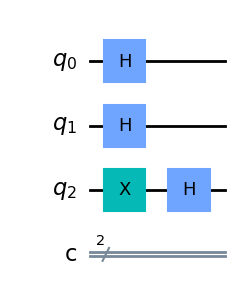

In [36]:
dj = QuantumCircuit(3,2)
dj.h([0,1])
dj.x(2)
dj.h(2)
dj.draw('mpl')

오라클은 q0과 q1이 각각 1일때 q2에 1을 가할수 있도록 CNot gate 하나를 control bit을 q0으로, target bit을 q2로 설정하고,CNOT 게이트를 control bit은 q1으로, target bit은  q2로 설정하여  구현해 봅시다.

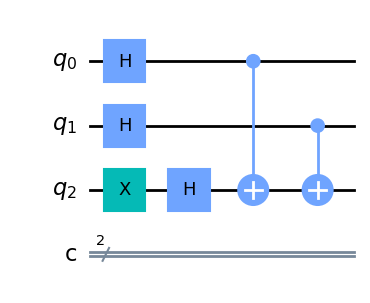

In [37]:
dj.cx(0,2)
dj.cx(1,2)
dj.draw('mpl')

이제 q0과 q1에 하다마드 게이트를 적용하고 이 두 큐비트에 측정을 가해봅니다.

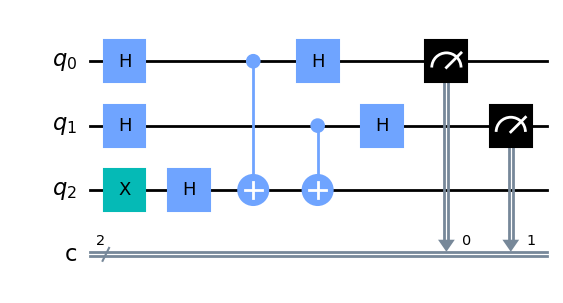

In [38]:
dj.h([0,1])
dj.measure(0,0)
dj.measure(1,1)
dj.draw('mpl')

Qiskit Sampler를 사용해 회로를 측정하고 결과를 plot_histogram으로 그려보세요

sampler = Sampler()

job = sampler.run(dj) 
res = job.result()
prob = res.quasi_dists[0].binary_probabilities()
plot_distribution(prob, figsize=(6, 4))


이 회로는 Balanced 함수입니다!

## Quantum Utility Era

지난 6월, IBM의 연구 결과가 네이처지의 표지를 장식했습니다. 

<img src="https://image.edaily.co.kr/images/photo/files/NP/S/2023/06/PS23061500596.jpg" alt="Alternative text" width=400/>

연구팀은 자기적인 성질을 띈 물질을 모형화 하고, 자기적인 물질을 구성하는 근본 요소인 “스핀”의 동역학을 시뮬레이션하기 위해 127개의 초전도 큐비트로 구성된 IBM ‘이글’ 양자 프로세서를 사용해 대규모 ‘얽힘’ 상태를 생성하여 자화(magnetization) 등의 물리적인 특성을 정확하게 계산해내었습니다. 이 계산의 정확성을 검증하기 위해 캘리포니아 대학교 버클리의 과학자 팀은 로렌스 버클리 국립연구소의 국립 에너지 연구 과학 컴퓨팅 센터(NERSC)와 퍼듀 대학교에 위치한 첨단 슈퍼컴퓨터에서 같은 물질의 시뮬레이션을 함께 진행했으며, 해당 논문과 이어진 후속 연구들의 결과들은, 여전히 NISQ 시대의 양자 백엔드도 최점단의 오류 완화 기술을 사용할 경우 고전적인 슈퍼컴퓨터와 어깨를 나란히 할 수 있는 실제 계산 결과를 내놓을 수 있게 되었음을 알렸으며 이 결과는 양자컴퓨터가 실제 연구에 "도구(utility)"로 사용 될 수 있는 시대에 접어 들엇음의 신호탄과 같이 볼 수 있을 것입니다.

이번 튜토리얼에서는 네이처 논문에 사용된 오류 정정 기법 중 하나인 Pulse Scaling을 실습해 보도록 하겠습니다. 우선 실습을 위해 간단한 양자 회로를 만들어 봅시다.

이하의 내용은 [qiskit-research repo](https://github.com/qiskit-community/qiskit-research/blob/main/docs/getting_started.ipynb)에서 더 자세하게 살펴보싥수 있습니다.


실습을 위해, 아주 간단한 이징 해밀토니안을 정의해 봅시다[ref](https://arxiv.org/abs/2108.09197):
$$
H = -J \sum_{\langle i,j \rangle} Z_i Z_j + h \sum_i X_i
$$

이 해밀토니안의 time evolution을 

$$
U = e^{-iHt},
$$

위와 같은 형태로, 양자컴퓨터를 사용해 계산해 봅시다. 회로의 transpile 성능을 검증하기 위해, nearest neighbor만을 계산하지 않고 all-to-all 연결을 가정합니다.

In [47]:
num_spins = 3

JJ = 0.5
hh = 1
tt = 0.1

ham = -JJ * sum(
    [
        sum(
            [
                (I ^ idx) ^ Z ^ (I ^ jdx) ^ Z ^ (I ^ (num_spins - idx - jdx - 2))
                for jdx in range(num_spins - idx - 1)
            ]
        )
        for idx in range(num_spins - 1)
    ]
) + hh * sum([(I ^ idx) ^ X ^ (I ^ (num_spins - idx - 1)) for idx in range(num_spins)])
U_ham = (ham * tt).exp_i()
print(U_ham)

e^(-i*-0.05 * ZZI
- 0.05 * ZIZ
- 0.05 * IZZ
+ 0.1 * XII
+ 0.1 * IXI
+ 0.1 * IIX)


## 연산자를 양자 회로로 변환하기

`qiskit.opflow` 모듈은 time-evolved 연산자(`EvolvedOp`s)를 양자회로로 바꾸는 역할을 합니다. 가장 흔히 사용되는 방법중 하나는 Suzuki-Trotter decomposition으로 evolution 시간 $t$가 `num_steps` $N$으로 쪼개지는 것입니다. `PauliTrotterEvolution`의 second-order를 선택하는 것으로 second order $\mathcal{O}((t/N)^2)$와 같은 역할을 하는 유니터리에 해당하는 회로를 생성할 수 있습니다.


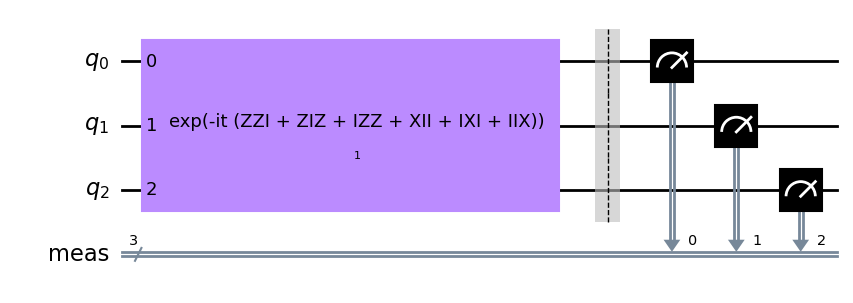

In [52]:
num_steps = 1
trot_circ = (
    PauliTrotterEvolution(trotter_mode=Suzuki(order=2, reps=num_steps))
    .convert(U_ham)
    .to_circuit()
)
trot_circ.measure_all()
trot_circ.draw("mpl")


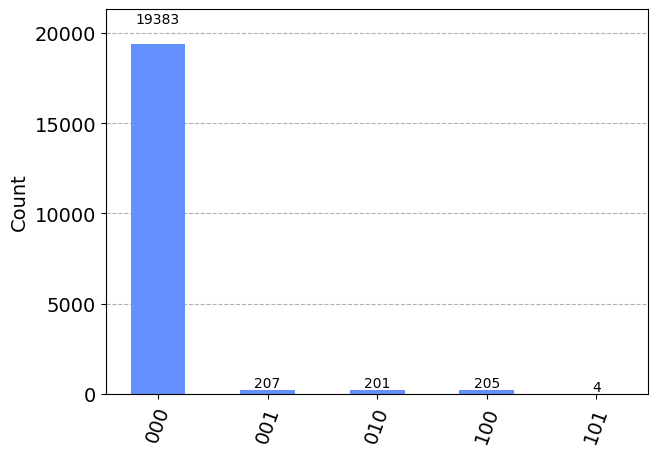

In [115]:
#노이즈가 없는 이상적인 경우의 결과

backend_sim = AerSimulator()
backend = FakeMumbai()

counts_ideal = backend_sim.run(transpile(trot_circ, backend_sim), shots=20000).result().get_counts()
plot_histogram(counts_ideal)

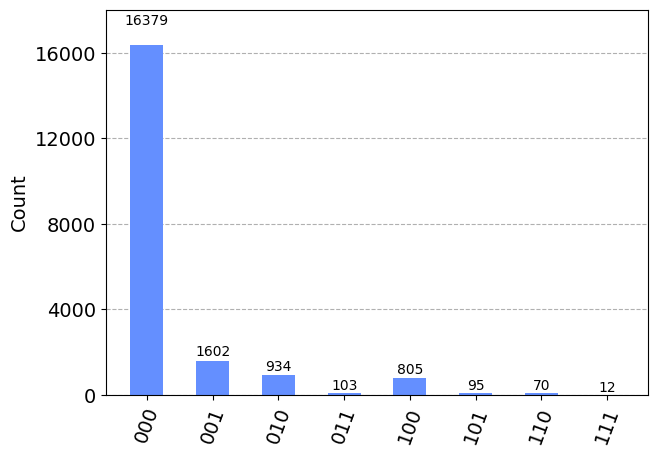

In [116]:
counts_default = backend.run(transpile(trot_circ, backend), shots=20000).result().get_counts()
plot_histogram(counts_default)

## Transpile for Good SWAP Mapping

일반적인 상황에서 양자회로는 실제 양자백엔드의 연결성에 의해 성능에 영향을 받습니다. 회로상으로 연결되어 있으나 실제 백엔드에서 큐비트가 연결되지 못할 경우 SWAP 연산이 계산에 추가되는데, 이 연산자는 계산의 비용 및 노이즈의 측면에서 `CX`가 사용되므로 좋지 않습니다. Qiskit의 transpiler를 `optimization_level=3`으로 사용할 경우 [SABRE SWAP method](https://arxiv.org/abs/1809.02573)를 사용하게 되는데, 이 방법은 효율적이지만 stochastic합니다. SWAP-mapping 자체가 NP-hard 문제이기도 합니다. 

아래의 코드를 사용해 주어진 회로가 가장 적은 CNOT 게이트를 사용하도록 시도해 보려 합니다. 

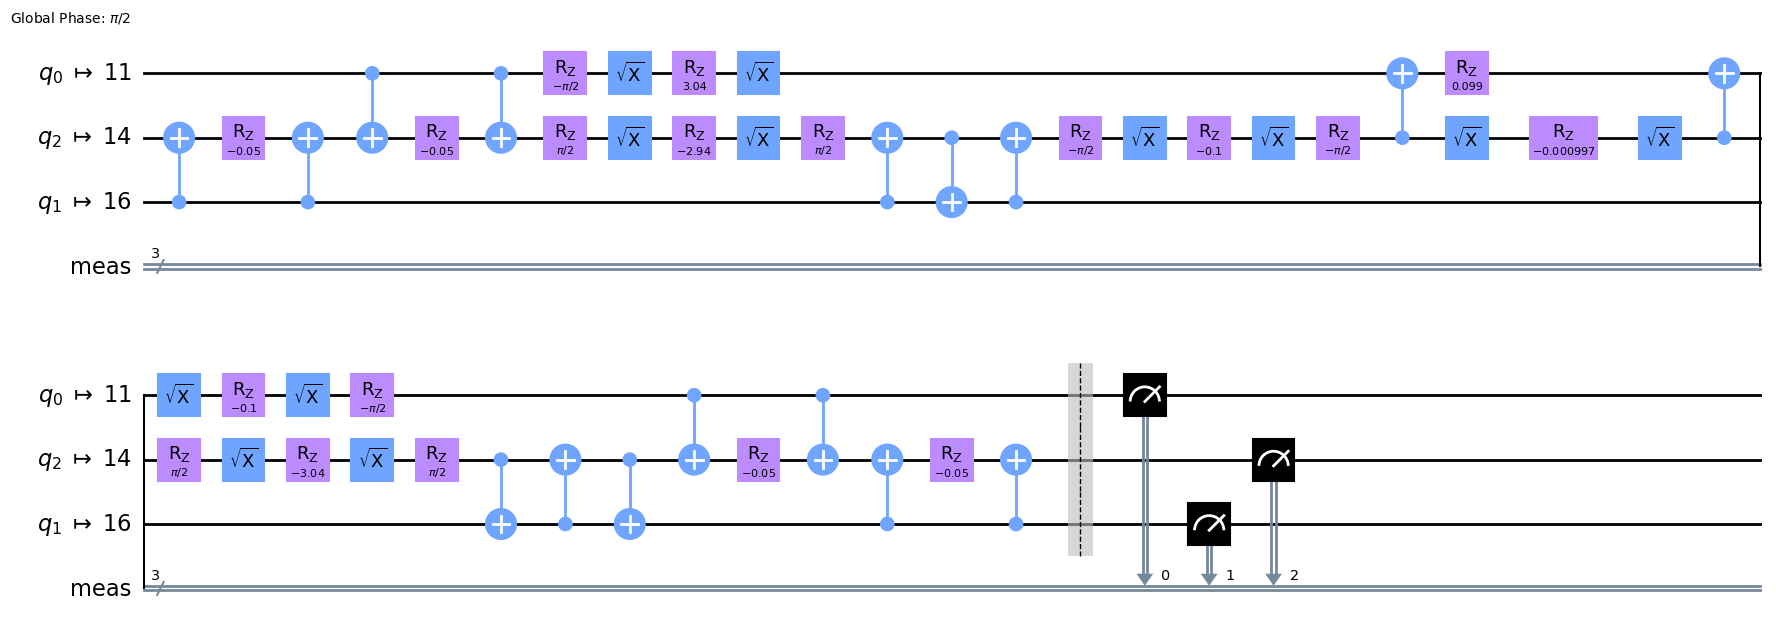

In [84]:
#기본 transpile 회로

trot_circ_ts_basic = transpile(
    trot_circ, backend, optimization_level=3
)

trot_circ_ts_basic.draw('mpl', idle_wires=False )

In [85]:
trot_circ_ts_basic.count_ops()["cx"]

16

In [88]:
num_tries = 5

trot_circ_ts = transpile(
    [trot_circ] * num_tries, backend, optimization_level=3, seed_transpiler = 1
)
cx_counts = [trot_circ_ts[idx].count_ops()["cx"] for idx in range(num_tries)]
print(cx_counts)

[12, 12, 12, 12, 12]


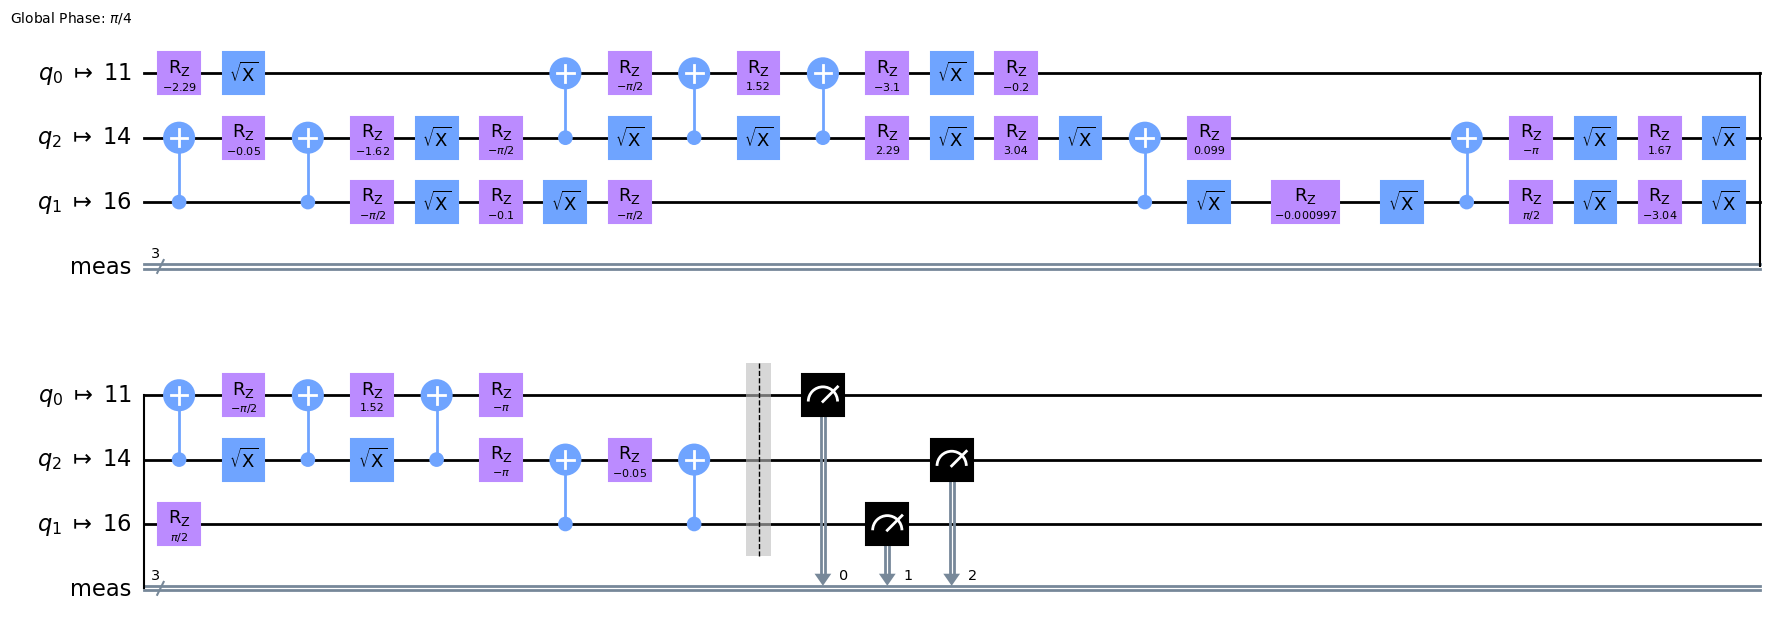

In [90]:
best_idx = np.argmin(cx_counts)
trot_circ_t = trot_circ_ts[best_idx]
trot_circ_t.draw('mpl', idle_wires=False )

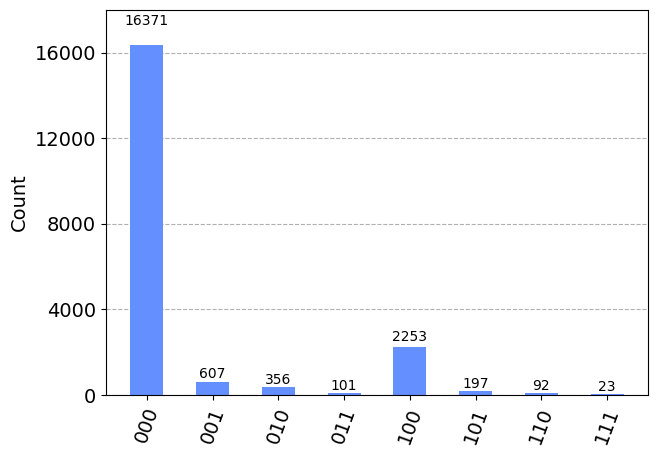

In [117]:
counts_better_swap = backend.run(trot_circ_t, shots=20000).result().get_counts()
plot_histogram(counts_better_swap)

## Noise-aware Layout

SWAP-mapped 횟수에 최적화된 회로를 얻었다면, 이제 실제 백엔드의 연결성에 최적화된 회로를 얻어 봅시다. [`mapomatic`](https://github.com/Qiskit-Partners/mapomatic)을 사용하면, 큐비트의 오류를 포함하여 실제 양자 백엔드에 계산 상의 큐비트를 최적으로 매칭한 회로를 얻을 수 있습니다. 점수가 낮을 수록 가장 좋은 결과에 해당합니다.


In [92]:
from mapomatic import deflate_circuit, evaluate_layouts, matching_layouts

trot_circ_def = deflate_circuit(trot_circ_t)
layouts = matching_layouts(trot_circ_def, backend)
scored_layouts = evaluate_layouts(
    trot_circ_def, layouts, backend
)  # cost_function = cost_func
print(scored_layouts)

[([20, 19, 22], 0.13433318452207121), ([22, 19, 20], 0.1343932683902468), ([4, 7, 10], 0.13548629178148464), ([10, 7, 4], 0.1354929625850566), ([4, 7, 6], 0.13960947747972574), ([6, 7, 4], 0.1396796637435348), ([2, 3, 5], 0.14020132586993617), ([5, 3, 2], 0.1402130174619406), ([25, 22, 19], 0.14693491184360086), ([19, 22, 25], 0.14697848934521163), ([21, 18, 17], 0.14847796054519125), ([17, 18, 21], 0.14869519673676468), ([23, 21, 18], 0.14893334885457632), ([18, 21, 23], 0.14907940768758265), ([26, 25, 22], 0.15505867294902853), ([22, 25, 26], 0.15506909520713852), ([24, 25, 26], 0.1586686553757124), ([26, 25, 24], 0.1588012722448191), ([1, 4, 7], 0.16200811253700553), ([7, 4, 1], 0.1628556166126044), ([16, 19, 22], 0.16340575942018953), ([10, 7, 6], 0.16348694778808026), ([6, 7, 10], 0.1635487319830531), ([22, 19, 16], 0.16383457416983704), ([12, 10, 7], 0.16388607821490098), ([7, 10, 12], 0.16395515556816997), ([24, 25, 22], 0.165082280939162), ([22, 25, 24], 0.16522418383983817), (

## Pulse Scaling

Trottered 양자 시뮬레이션과 같은 문제는, 일반적으로 아주 작은 크기의 양자 상태의 회전을 다룹니다. 이런 경우, 적절한 근사를 통해, CX게이트는 $R_{ZX}(\pi/2)$ 회전으로 근사 될 수 있으며, 다음의 코드로 확인할 수 있습니다. 


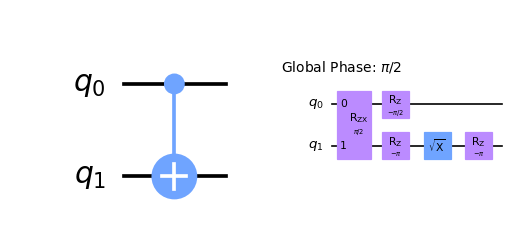

In [41]:
qc = QuantumCircuit(2)
qc.cx(0, 1)
qc_rzx = transpile(qc, basis_gates=["sx", "rz", "rzx"])

fig, (ax1, ax2) = plt.subplots(1, 2)
qc.draw("mpl", ax=ax1)
qc_rzx.draw("mpl", ax=ax2)

`RZXGate`는 IBM의 백엔드들에서 얽힘을 구현하는데 사용되는 [echoed cross resonance](https://arxiv.org/abs/1603.04821)와 상당히 유사합니다. 특히, 이징 모델을 계산하는 우리의 예제의 $ZZ$ interaction과 같은 경우, 에러나 노이즈의 측면에서 $R_{ZX}(\theta)$ 회전으로 표현 되는 것이 훨씬 효과적이며, `unroll_rzx_to_ecr`를 `False`로 설정하면 자동으로 scaled echoed cross resonance `secr` 게이트로 쪼개져 적용됩니다.


Text(0.5, 1.0, 'These are all equivalent circuits')

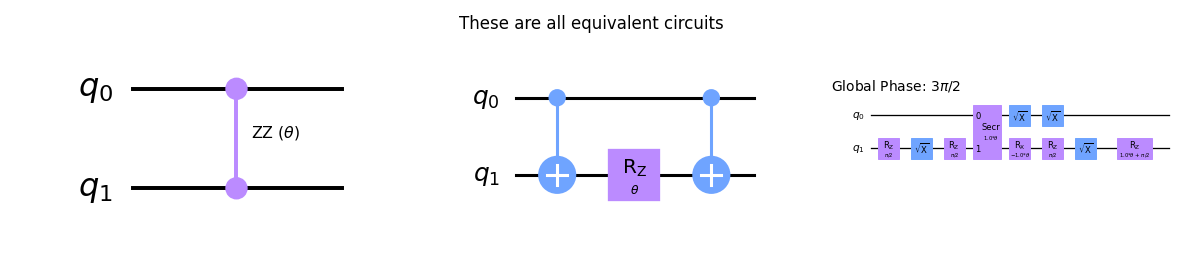

In [112]:
from qiskit_research.utils.convenience import scale_cr_pulses

qc = QuantumCircuit(2)
qc.rzz(theta, 0, 1)
qc_cx = transpile(qc, basis_gates=["rz", "sx", "cx"])
qc_rzx = scale_cr_pulses(qc_cx, backend)  # unroll_rzx_to_ecr = True, param_bind = {}

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6))
qc.draw("mpl", ax=ax1)
qc_cx.draw("mpl", ax=ax2)
qc_rzx.draw("mpl", ax=ax3)
ax2.set_title("These are all equivalent circuits")

이제 이 방법으로 예제 회로를 최적화하고 회로의 실행 결과를 비교해 봅시다.

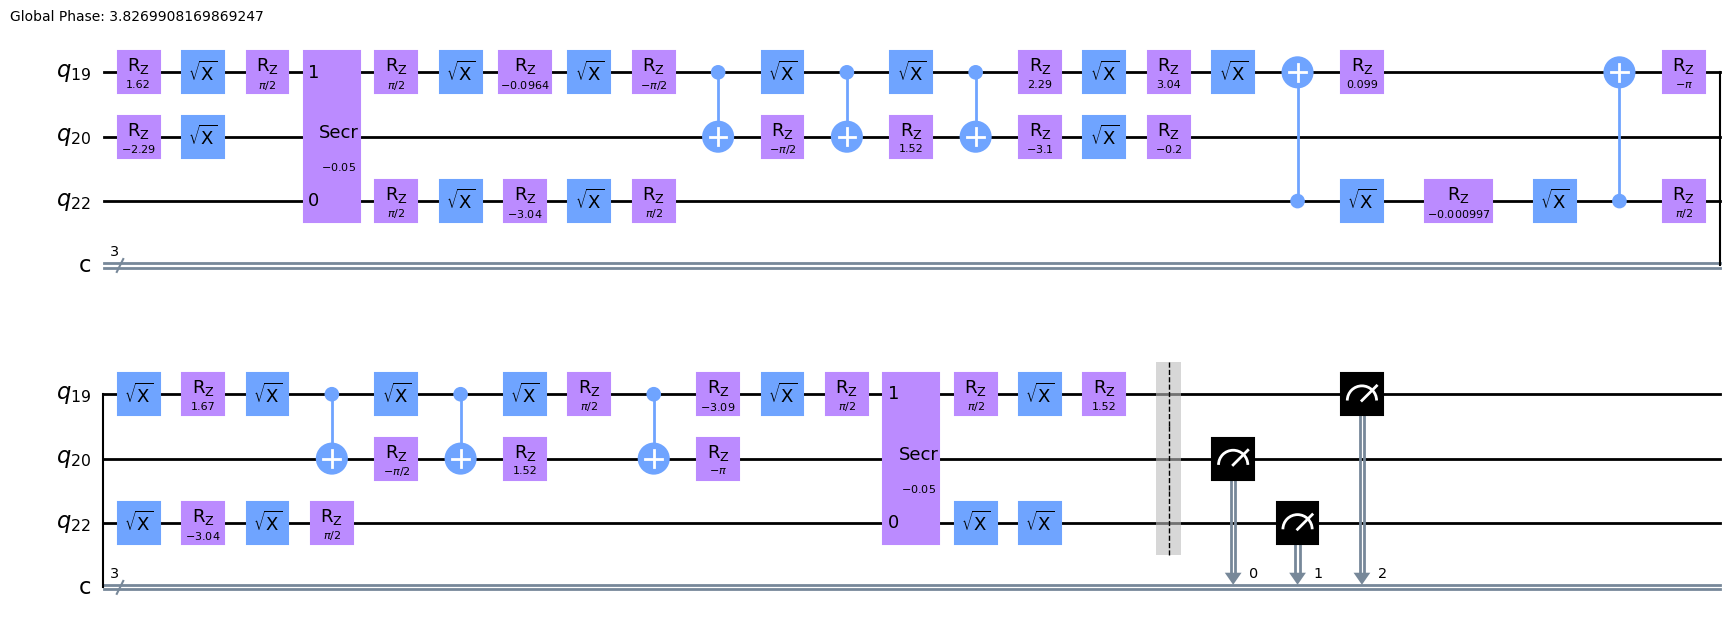

In [93]:
my_layout = scored_layouts[0][0]  # the layout with the lowest score (i.e., error)
trot_circ_sca = scale_cr_pulses(
    transpile(trot_circ_def, initial_layout=my_layout), backend
)
trot_circ_sca.draw("mpl", idle_wires=False)

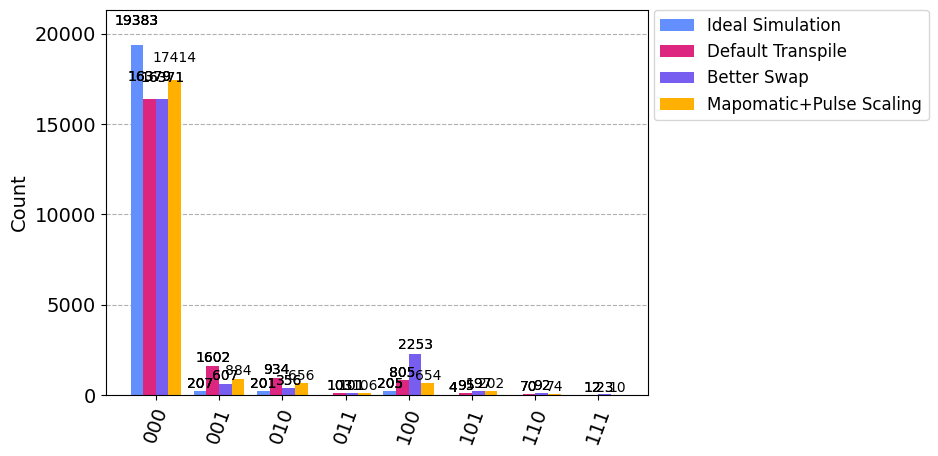

In [123]:
counts_pulse_scale = backend.run(transpile(trot_circ_sca, backend), shots=20000).result().get_counts()
legend = ['Ideal Simulation', 'Default Transpile', 'Better Swap', 'Mapomatic+Pulse Scaling']

plot_histogram([counts_ideal, counts_default, counts_better_swap, counts_pulse_scale], legend=legend)